In [33]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import zipfile
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.applications import VGG16
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
import random

In [34]:
# Set seed for reproducibility
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [35]:
#Set the batch size,epochs
batch_size =  32
n_epochs = 5
img_rows, img_cols = 224, 224
input_shape = (img_rows, img_cols, 3)

data loading

In [36]:
# Define directories for train, test, and validation splits
extract_path = "chest_xray"
train_dir = os.path.join(extract_path, 'train')
test_dir = os.path.join(extract_path, 'test')
valid_dir = os.path.join(extract_path, 'val')

In [37]:
# Create ImageDataGenerators to preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [38]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_rows, img_cols),   # Resize images to the size VGG16 expects
    batch_size=batch_size,
    seed = seed_value,
    class_mode='binary',
    shuffle=True # Binary classification: dent vs crack
)

Found 1077 images belonging to 2 classes.


In [39]:
valid_generator = valid_datagen.flow_from_directory(
    directory = valid_dir,
    class_mode = 'binary',
    seed = seed_value,
    batch_size = batch_size,
    shuffle = False,
    target_size = (img_rows, img_cols)
)

Found 216 images belonging to 2 classes.


In [40]:
#Write your code here
test_generator = test_datagen.flow_from_directory(
    directory= test_dir,
    class_mode= 'binary',
    seed= seed_value,
    batch_size= batch_size,
    shuffle= False,
    target_size= (img_rows, img_cols)
)

Found 265 images belonging to 2 classes.


In [41]:
#Write your code here
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(img_rows, img_cols, 3)
)

In [42]:
output = base_model.layers[-1].output
output = keras.layers.Flatten()(output)
base_model = Model(base_model.input, output)

# Freeze the base VGG16 model layers
for layer in base_model.layers:
    layer.trainable = False

In [43]:
# Build the custom model
model = Sequential()
model.add(base_model)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [44]:
# Write your code here
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [45]:
#Enter your code here
history = model.fit(
    train_generator,  # Fill in with the training data generator or dataset
    epochs=n_epochs,  # Fill in with the number of epochs for training
    validation_data=valid_generator,  # Fill in with the validation data generator or dataset
)

Epoch 1/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 189s 5s/step - accuracy: 0.7732 - loss: 0.4344 - val_accuracy: 0.8889 - val_loss: 0.2618
Epoch 2/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 191s 6s/step - accuracy: 0.9612 - loss: 0.1294 - val_accuracy: 0.9074 - val_loss: 0.2121
Epoch 3/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 210s 6s/step - accuracy: 0.9677 - loss: 0.0972 - val_accuracy: 0.9398 - val_loss: 0.1291
Epoch 4/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 235s 7s/step - accuracy: 0.9811 - loss: 0.0588 - val_accuracy: 0.9306 - val_loss: 0.1653
Epoch 5/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 238s 7s/step - accuracy: 0.9888 - loss: 0.0466 - val_accuracy: 0.9676 - val_loss: 0.0977


In [46]:
train_history = model.history.history  # After training

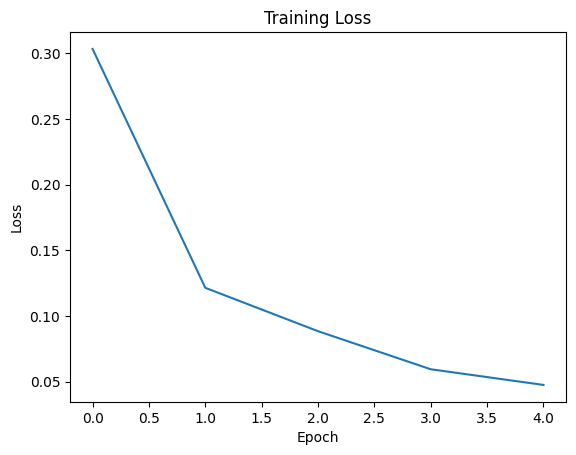

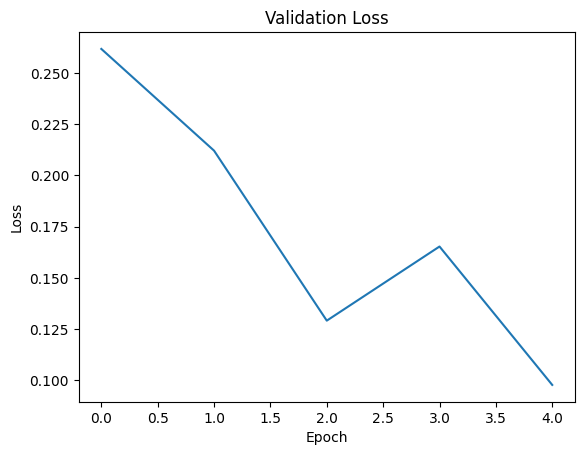

In [47]:
# Plot the loss for both training and validation
plt.title("Training Loss")
plt.ylabel("Loss")
plt.xlabel('Epoch')
plt.plot(train_history['loss'])
plt.show()

plt.title("Validation Loss")
plt.ylabel("Loss")
plt.xlabel('Epoch')
plt.plot(train_history['val_loss'])
plt.show()

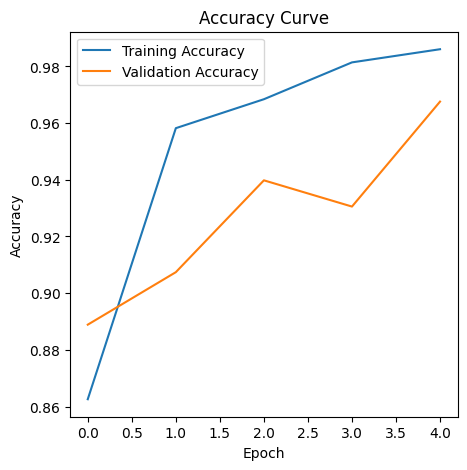

In [48]:
# Write your code here
plt.figure(figsize=(5, 5))
plt.plot(train_history['accuracy'], label ='Training Accuracy')
plt.plot(train_history['val_accuracy'], label = 'Validation Accuracy')
plt.title("Accuracy Curve")
plt.ylabel("Accuracy")
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [49]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.9890 - loss: 0.0398
Test Loss: 0.0430
Test Accuracy: 0.9883


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Function to plot a single image and its prediction
def plot_image_with_title(image, model, true_label, predicted_label, class_names):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)

    # Convert labels from one-hot to class indices if needed, but for binary labels it's just 0 or 1
    true_label_name = class_names[true_label]  # Labels are already in class indices
    pred_label_name = class_names[predicted_label]  # Predictions are 0 or 1

    plt.title(f"True: {true_label_name}\nPred: {pred_label_name}")
    plt.axis('off')
    plt.show()

# Function to test the model with images from the test set
def test_model_on_image(test_generator, model, index_to_plot=0):
    # Get a batch of images and labels from the test generator
    test_images, test_labels = next(test_generator)

    # Make predictions on the batch
    predictions = model.predict(test_images)

    # In binary classification, predictions are probabilities (float). Convert to binary (0 or 1)
    predicted_classes = (predictions > 0.5).astype(int).flatten()

    # Get the class indices from the test generator and invert them to get class names
    class_indices = test_generator.class_indices
    class_names = {v: k for k, v in class_indices.items()}  # Invert the dictionary

    # Specify the image to display based on the index
    image_to_plot = test_images[index_to_plot]
    true_label = test_labels[index_to_plot]
    predicted_label = predicted_classes[index_to_plot]

    # Plot the selected image with its true and predicted labels
    plot_image_with_title(image=image_to_plot, model=model, true_label=true_label, predicted_label=predicted_label, class_names=class_names)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def evaluate_model_with_confusion_matrix(model, test_generator):
    # Reset generator to start from the beginning
    test_generator.reset()

    # Predict on the entire test set
    predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

    # Convert probabilities to class labels (for binary classification: 0 or 1)
    predicted_classes = (predictions > 0.5).astype(int).flatten()

    # Get true labels
    true_classes = test_generator.classes  # Ground truth labels as integers

    # Get class labels (e.g. {'cats': 0, 'dogs': 1}) and reverse mapping
    class_labels = list(test_generator.class_indices.keys())

    # Compute confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


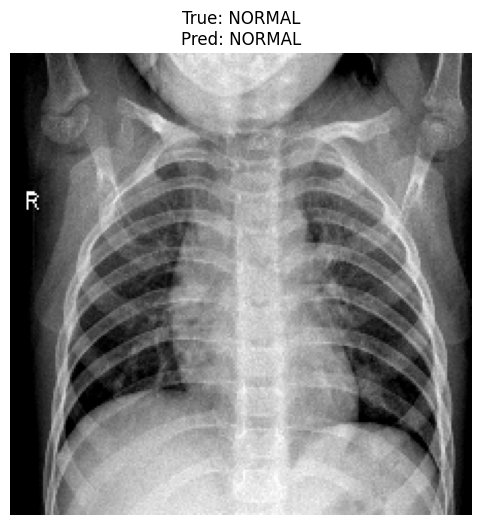

9/9 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step


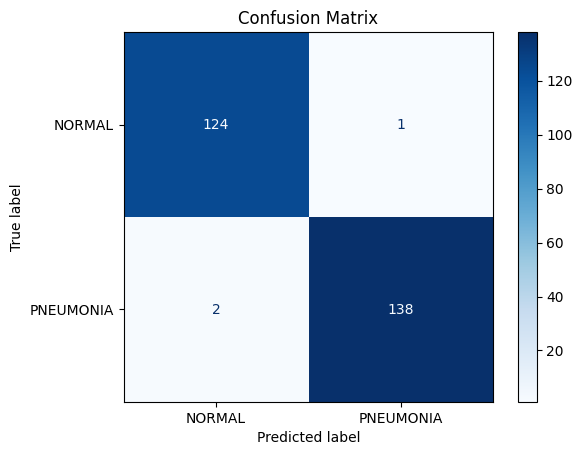

In [51]:
#Write your code here
test_model_on_image(test_generator, model, index_to_plot=1)
evaluate_model_with_confusion_matrix(model, test_generator)